# Name: Royston Marian Mascarenhas

# EE569 HW 5 April 7th, 2019

## remaining 1(b) and proposed network of 1(c)

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import models
import sklearn.metrics as skm
import seaborn as sns

# Setting : Learning rate



In [6]:
from keras.datasets import mnist

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

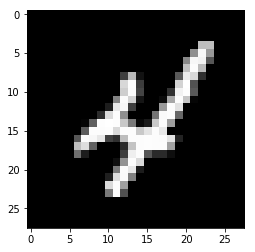

In [38]:
plt.imshow(x_train[9],cmap='gray')

In [39]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1).copy()

In [40]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [41]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [79]:
model = Sequential()

In [80]:
model.add(Conv2D(filters=6,kernel_size = (5,5),strides=1,padding = 'same', input_shape = (28,28,1),activation='relu',))

In [81]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [82]:
model.add(Conv2D(filters=16,kernel_size = (5,5), strides=1,activation='relu',))

In [83]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [84]:
model.add(Flatten())

In [85]:
model.add(Dense(120, activation="relu"))

In [86]:
model.add(Dense(84, activation="relu"))

In [87]:
model.add(Dense(10, activation="softmax"))

In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_17 (Dense)             (None, 84)                10164     
__________

In [89]:
adam = keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [90]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=12,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 58s 959us/step - loss: 1.9412 - acc: 0.4743 - val_loss: 1.2765 - val_acc: 0.7326
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.8417 - acc: 0.7976 - val_loss: 0.5613 - val_acc: 0.8584
Epoch 3/12
60000/60000 [==============================] - 59s 976us/step - loss: 0.4825 - acc: 0.8685 - val_loss: 0.3926 - val_acc: 0.8966
Epoch 4/12
60000/60000 [==============================] - 52s 860us/step - loss: 0.3662 - acc: 0.8979 - val_loss: 0.3157 - val_acc: 0.9147
Epoch 5/12
60000/60000 [==============================] - 51s 851us/step - loss: 0.3090 - acc: 0.9117 - val_loss: 0.2750 - val_acc: 0.9232
Epoch 6/12
60000/60000 [==============================] - 51s 843us/step - loss: 0.2740 - acc: 0.9209 - val_loss: 0.2473 - val_acc: 0.9299
Epoch 7/12
60000/60000 [==============================] - 51s 846us/step - loss: 0.2491 - acc: 0.9276 - val_loss: 0.22

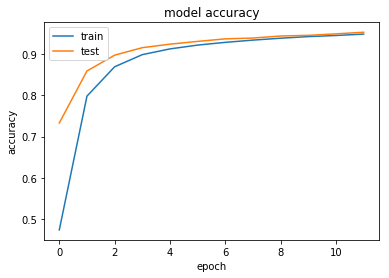

In [92]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
y_test_labels = []
for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
len(y_test_labels)

10000

In [94]:
model.evaluate(x_test,y_test,batch_size=32)

10000/10000 [==============================] - 6s 574us/step


[0.16528004280030728, 0.952]

# Setting : Overfitting

In [108]:
modelK = Sequential()

In [109]:
modelK.add(Conv2D(filters=6,kernel_size = (5,5),strides=1,padding = 'same', input_shape = (28,28,1),activation='relu',))

In [110]:
modelK.add(MaxPooling2D(pool_size=(2, 2)))

In [111]:
modelK.add(Conv2D(filters=16,kernel_size = (5,5), strides=1,activation='relu',))

In [112]:
modelK.add(MaxPooling2D(pool_size=(2, 2)))

In [113]:
modelK.add(Flatten())

In [114]:
modelK.add(Dense(120, activation="relu"))

In [115]:
modelK.add(Dense(84, activation="relu"))

In [116]:
modelK.add(Dense(10, activation="softmax"))

In [117]:
modelK.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_23 (Dense)             (None, 84)                10164     
__________

In [118]:
adam = keras.optimizers.Adam()
modelK.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [119]:
historyK = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 55s 912us/step - loss: 0.0772 - acc: 0.9775 - val_loss: 0.0696 - val_acc: 0.9776
Epoch 2/30
60000/60000 [==============================] - 41s 686us/step - loss: 0.0764 - acc: 0.9772 - val_loss: 0.0692 - val_acc: 0.9773
Epoch 3/30
60000/60000 [==============================] - 40s 665us/step - loss: 0.0751 - acc: 0.9777 - val_loss: 0.0695 - val_acc: 0.9780
Epoch 4/30
60000/60000 [==============================] - 40s 666us/step - loss: 0.0738 - acc: 0.9781 - val_loss: 0.0667 - val_acc: 0.9781
Epoch 5/30
60000/60000 [==============================] - 40s 666us/step - loss: 0.0729 - acc: 0.9785 - val_loss: 0.0654 - val_acc: 0.9785
Epoch 6/30
60000/60000 [==============================] - 41s 676us/step - loss: 0.0717 - acc: 0.9788 - val_loss: 0.0646 - val_acc: 0.9782
Epoch 7/30
60000/60000 [==============================] - 41s 688us/step - loss: 0.0706 - acc: 0.9793 - val_loss: 0.

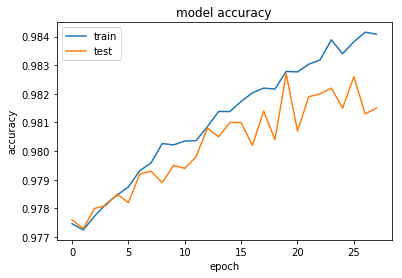

In [128]:
plt.plot(historyK.history['acc'][0:28])
plt.plot(historyK.history['val_acc'][0:28])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_test_labels = []
for i in range(0, len(y_test)):
    y_test_labels.append(int(np.argmax(y_test[i])))
len(y_test_labels)

In [94]:
modelK.evaluate(x_test,y_test,batch_size=32)

10000/10000 [==============================] - 6s 574us/step


[0.16528004280030728, 0.952]

## 1 (c) proposed network

In [ ]:
(xb_train, yb_train), (xb_test, yb_test) = mnist.load_data()
xw_train = 255 - xb_train
xw_test = 255 - xb_test
yw_train = yb_train
yw_test = yb_test
data_train = np.zeros((120000,28,28))
data_labels = np.zeros((120000))
test_train = np.zeros((20000,28,28))
test_labels = np.zeros((20000))
data_train[0:60000,:,:] = xb_train[:,:,:]
data_train[60000:,:,:] = xw_train[:,:,:]
data_labels[0:60000] = yb_train[:]
data_labels[60000:] = yw_train[:]
test_train[0:10000,:,:] = xb_test[:,:,:] 
test_train[10000:,:,:] = xw_test[:,:,:]
test_labels[0:10000] = yb_test[:]
test_labels[10000:] = yw_test[:]

In [458]:
(xb_train, yb_train), (xb_test, yb_test) = mnist.load_data()

In [459]:
xw_train = 255 - xb_train
xw_test = 255 - xb_test
yw_train = yb_train
yw_test = yb_test

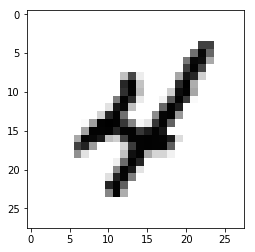

In [460]:
plt.imshow(xw_train[9],cmap='gray')

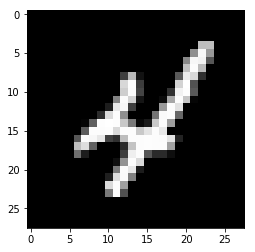

In [461]:
plt.imshow(xb_train[9],cmap='gray')

In [462]:
np.shape(yw_train)

(60000,)

In [463]:
data_train = np.zeros((120000,28,28))
data_labels = np.zeros((120000))
test_train = np.zeros((20000,28,28))
test_labels = np.zeros((20000))

In [464]:
data_train[0:60000,:,:] = xb_train[:,:,:]
data_train[60000:,:,:] = xw_train[:,:,:]
data_labels[0:60000] = yb_train[:]
data_labels[60000:] = yw_train[:]
test_train[0:10000,:,:] = xb_test[:,:,:] 
test_train[10000:,:,:] = xw_test[:,:,:]
test_labels[0:10000] = yb_test[:]
test_labels[10000:] = yw_test[:]

3.0


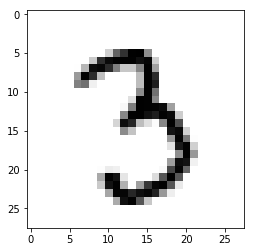

In [465]:
plt.imshow(data_train[90000,:,:],cmap='gray')
print(data_labels[90000])


In [466]:
lst = np.arange(120000)
np.random.shuffle(lst)

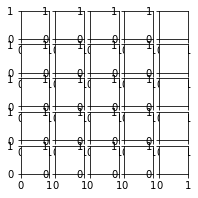

In [438]:
temp = 11;
temp_img = np.zeros((28,28))
f, sub = plt.subplots(5,5,figsize=(3,3))
for i in range (0,120000):
    s = lst[i]
    #print(s)
    temp_img = data_train[i,:,:]
    data_train[i,:,:] = data_train[s,:,:]
    data_train[s,:,:] = temp_img
    #sub[0,i].imshow(data_train[i,:,:])
    temp = data_labels[i]
    data_labels[i]=data_labels[s]
    data_labels[s]=temp
    #print(data_labels[i])
    #print("***")

In [439]:
np.shape(sub)

(5, 5)

In [440]:
np.shape(a)

(28, 28)

In [1]:
plt.imshow(test_train[510,:,:],cmap='gray')
print(test_labels[510])

NameError: name 'plt' is not defined

In [444]:
import scipy.stats as sc
sc.mode(data_labels)

ModeResult(mode=array([1.]), count=array([13484]))

In [445]:
count = 0
for i in range(0,120000):
    if (data_labels[i]==1):
        count = count + 1

In [446]:
count

13484

In [467]:
data_train = data_train.reshape(120000,28,28,1)
test_train = test_train.reshape(20000,28,28,1)


In [468]:
np.shape(test_train)

(20000, 28, 28, 1)

In [469]:
data_train = data_train.astype('float32')
test_train = test_train.astype('float32')
data_train /= 255
test_train /= 255


In [470]:
data_labels = keras.utils.to_categorical(data_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [471]:
modelG = conv_model(model_fname="modelG_v1.json",weight_fname="modelG_v1.h5",x_train=data_train,y_train=data_labels)
modelG.train_model(filters1=18,filters2 = 25,kernel_size1 = (5,5),kernel_size2 = (5,5),
            dense1= 120, dense2=84 , stride=None,pool_size_=(2,2),strides_pool = None)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 18)        468       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 25)        11275     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 625)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 120)               75120     
_________________________________________________________________
dense_29 (Dense)             (None, 84)                10164     
__________

In [473]:
modelG.compile_model(optimizer_='rmsprop',loss_='categorical_crossentropy')
modelG.fit_model(val_flag=1,epoch=4,x_test=test_train,y_test=test_labels,batch_size_=32)

Train on 120000 samples, validate on 20000 samples
Epoch 1/4
120000/120000 [==============================] - 166s 1ms/step - loss: 0.0400 - mean_absolute_error: 0.0028 - acc: 0.9891 - val_loss: 0.0440 - val_mean_absolute_error: 0.0026 - val_acc: 0.9887
Epoch 2/4
120000/120000 [==============================] - 167s 1ms/step - loss: 0.0388 - mean_absolute_error: 0.0025 - acc: 0.9901 - val_loss: 0.0521 - val_mean_absolute_error: 0.0047 - val_acc: 0.9845
Epoch 3/4
120000/120000 [==============================] - 174s 1ms/step - loss: 0.0402 - mean_absolute_error: 0.0025 - acc: 0.9900 - val_loss: 0.0518 - val_mean_absolute_error: 0.0026 - val_acc: 0.9888
Epoch 4/4
120000/120000 [==============================] - 163s 1ms/step - loss: 0.0427 - mean_absolute_error: 0.0025 - acc: 0.9898 - val_loss: 0.0552 - val_mean_absolute_error: 0.0032 - val_acc: 0.9863


In [534]:
test = np.zeros((10,28,28))
test[0,:,:] = xw_test [284,:,:]
test[1,:,:] = xb_test [20,:,:]
test[2,:,:] = xw_test [2289,:,:]
test[3,:,:] = xw_test [330,:,:]
test[4,:,:] = xb_test [1040,:,:]
test[5,:,:] = xb_test [41,:,:]
test[6,:,:] = xb_test [25,:,:]
test[7,:,:] = xw_test [11,:,:]
test[8,:,:] = xb_test [99,:,:]
test[9,:,:] = xw_test [22,:,:]

test = test.reshape(10,28,28,1)
truetest = [yw_test[284],yw_test[20],yw_test[2289],yw_test[330],yw_test[1040],yw_test[41],yw_test[25],yw_test[11],yw_test[99],
            yw_test[22]]

In [535]:
modelG.model.predict_classes(test)

array([9, 9, 8, 7, 1, 7, 0, 5, 9, 5], dtype=int64)

In [536]:
truetest

[9, 9, 8, 1, 1, 7, 0, 6, 9, 6]

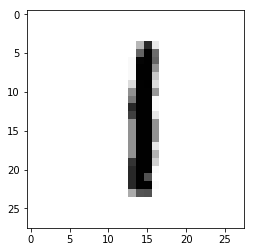

In [530]:
plt.imshow(test[3,:,:,0],cmap='gray')

In [2]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import model_from_json

C:\Users\royma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [54]:
class conv_model_mod():
    def __init__ (self,model_fname,weight_fname,x_train,y_train):
        self.model_fname = model_fname;
        self.weight_fname = weight_fname;
        self.x_train = x_train;
        self.y_train = y_train;
    
    def train_model(self,filters1=6,filters2 = 16,kernel_size1 = (5,5),kernel_size2 = (5,5),dense1= 120, dense2=84 , 
                    activation1 = 'relu', activation2 = 'relu', stride=None,pool_size_=(2,2),strides_pool = None):
        self.model = Sequential()
        if(stride!=None):
            self.model.add(Conv2D(filters=filters1,kernel_size = kernel_size1,strides = stride,padding = 'same', input_shape = (28,28,1)))
        else:
            self.model.add(Conv2D(filters=filters1,kernel_size = kernel_size1,padding = 'same', input_shape = (28,28,1)))
        self.model.add(BatchNormalization())
        self.model.add(Activation(activation1))
        self.model.add(MaxPooling2D(pool_size=pool_size_,strides=strides_pool))
        if(stride!=None):
            self.model.add(Conv2D(filters=filters2,kernel_size = kernel_size2,strides = stride))
        else:
            self.model.add(Conv2D(filters=filters2,kernel_size = kernel_size2))
        self.model.add(BatchNormalization())
        self.model.add(Activation(activation2))
        self.model.add(MaxPooling2D(pool_size=pool_size_,strides=strides_pool))
        self.model.add(Flatten())
        self.model.add(Dense(dense1, activation="relu"))
        self.model.add(Dropout(0.4))
        self.model.add(Dense(dense2, activation="relu"))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(10, activation="softmax"))
        self.model.summary()
        
    def compile_model(self,optimizer_='rmsprop',loss_='categorical_crossentropy'):
        self.model.compile(optimizer=optimizer_, loss=loss_,metrics=['mae', 'accuracy'])
    
    def fit_model(self,val_flag,epoch,x_test,y_test,cb_name,batch_size_=None):
        cb = [EarlyStopping(monitor='val_acc', verbose = 1, patience=3),
             ModelCheckpoint(filepath=cb_name, monitor='val_acc', save_best_only=True)]
        if val_flag == 1:
            self.history=self.model.fit(
                self.x_train,
                self.y_train,
                batch_size=batch_size_,
                epochs=epoch,
                callbacks=cb,
                validation_data=(x_test, y_test),
                shuffle=True
            )
        else:
            self.history=self.model.fit(
                self.x_train,
                self.y_train,
                batch_size=batch_size_,
                epochs=epoch,
                shuffle=True
            )
        
        # Save the weights
        self.model.save_weights(self.weight_fname)
        
        # Save the model architecture
        with open(self.model_fname, 'w') as f:
            f.write(self.model.to_json())
            
    def evaluate_model(self,x_test,y_test,batch_size_=None):
        results = self.model.evaluate(x_test,y_test,batch_size=batch_size_)
        metrics = self.model.metrics_names
        return results,metrics
    
    def plot_curve(self):
        plt.plot(self.history.history['acc'])
        plt.plot(self.history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
    def visualize(self,layer_no,filters):
            ind_list = [1,3,5]  #,7,2,0,18,15,17,18]
            layer_outputs = [layer.output for layer in self.model.layers[:np.shape(self.model.layers)[0]]]
            activation_model = models.Model(inputs=self.model.input, outputs=layer_outputs)
            for i in range(0,3):
                ind = ind_list[i]
                pred_img = self.x_train[ind]
                pred_img = pred_img.reshape(1,28,28,1)
                layers = activation_model.predict(pred_img)
                layer_v = layers[layer_no]
                var = int(np.floor(filters/2))
                f,sub = plt.subplots(2,var,figsize=(10,10))
                j=0
                for k1 in range(0,2):
                    for k2 in range(0,var):
                        sub[k1,k2].imshow(layer_v[0, :, :, j],cmap='gray')
                        j=j+1
                        if (j>filters):
                            break
                '''for j in range(0,filters):
                    plt.imshow(layer_v[0, :, :, j],cmap='gray')'''
                    
    def confusion_matrix(self,x_test,y_test):
        pred_labels = self.model.predict_classes(x_test)
        conf_mat = skm.confusion_matrix(y_test,pred_labels)
        sns.heatmap(conf_mat, annot=True,fmt='g')

In [7]:
(xb_train, yb_train), (xb_test, yb_test) = mnist.load_data()
xw_train = 255 - xb_train
xw_test = 255 - xb_test
yw_train = yb_train
yw_test = yb_test
data_train1 = np.zeros((120000,28,28))
data_labels1 = np.zeros((120000))
test_train1 = np.zeros((20000,28,28))
test_labels1 = np.zeros((20000))
data_train1[0:60000,:,:] = xb_train[:,:,:]
data_train1[60000:,:,:] = xw_train[:,:,:]
data_labels1[0:60000] = yb_train[:]
data_labels1[60000:] = yw_train[:]
test_train1[0:10000,:,:] = xb_test[:,:,:] 
test_train1[10000:,:,:] = xw_test[:,:,:]
test_labels1[0:10000] = yb_test[:]
test_labels1[10000:] = yw_test[:]
data_train = np.zeros((120000,28,28))
data_labels = np.zeros((120000))
test_train = np.zeros((20000,28,28))
test_labels = np.zeros((20000))

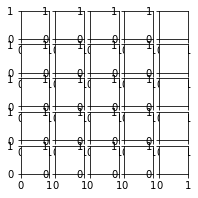

In [8]:
temp = 11;
temp_img = np.zeros((28,28))
lst = np.arange(120000)
np.random.shuffle(lst)
f, sub = plt.subplots(5,5,figsize=(3,3))
for i in range (0,120000):
    s = lst[i]
    data_train[i,:,:]=data_train1[s,:,:]
    data_labels[i]= data_labels1[s]
 
lst = np.arange(20000)
np.random.shuffle(lst)
for i in range (0,20000):
    s = lst[i]
    test_train[i,:,:]=test_train1[s,:,:]
    test_labels[i]= test_labels1[s]


5.0


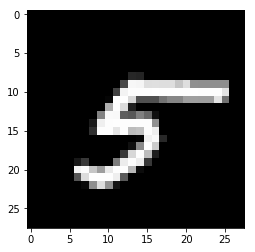

In [9]:
plt.imshow(data_train[9661,:,:],cmap='gray')
print(data_labels[9661])

In [10]:
count = 0

for i in range(0,120000):
    if (data_labels[i]==1):
        count = count + 1

count

13484

In [11]:
data_labels = keras.utils.to_categorical(data_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [12]:
data_train = data_train.reshape(120000,28,28,1)
test_train = test_train.reshape(20000,28,28,1)

In [13]:
data_train = data_train.astype('float32')
test_train = test_train.astype('float32')
data_train /= 255
test_train /= 255

In [14]:
modelG1 = conv_model_mod(model_fname="modelG1_v1.json",weight_fname="modelG1_v1.h5",x_train=data_train,y_train=data_labels)
modelG1.train_model(filters1=18,filters2 = 25,kernel_size1 = (5,5),kernel_size2 = (5,5),
            dense1= 120, dense2=84 , stride=None,pool_size_=(2,2),strides_pool = None)
modelG1.compile_model(optimizer_='adam',loss_='categorical_crossentropy')
modelG1.fit_model(val_flag=1,epoch=17,x_test=test_train,y_test=test_labels,cb_name="modelG1.h5",batch_size_=32)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 18)        468       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 18)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 18)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 25)        11275     
_________________________________________________________________
batch_normalization_2

In [15]:
results,metrics = modelG1.evaluate_model(test_train,test_labels,batch_size_=None)
print (results)
print(metrics)

20000/20000 [==============================] - 15s 770us/step
[0.03245008281197791, 0.0020438466409468817, 0.99165]
['loss', 'mean_absolute_error', 'acc']


In [17]:
from pathlib import Path
f = Path("modelG1_v1.json")
modelvar = f.read_text()
model_temp = model_from_json(modelvar)
#Accuracy of best model ( early stopping model )
model_temp.load_weights("modelG1.h5")
model_temp.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['mae', 'accuracy'])
model_temp.evaluate(test_train,test_labels,batch_size=None)

20000/20000 [==============================] - 16s 781us/step


[0.0307938911443468, 0.0019987618271780925, 0.9919]

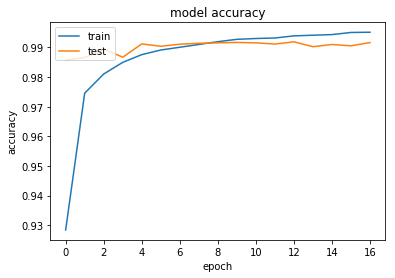

In [18]:
modelG1.plot_curve()

In [28]:
test = np.zeros((8,28,28))
test[0,:,:] = xw_test [284,:,:]
test[1,:,:] = xb_test [509,:,:]
test[2,:,:] = xw_test [2289,:,:]
test[3,:,:] = xw_test [52,:,:]
#test[4,:,:] = xb_test [2,:,:]
#test[5,:,:] = xb_test [41,:,:]
test[4,:,:] = xb_test [25,:,:]
test[5,:,:] = xw_test [11,:,:]
test[6,:,:] = xb_test [99,:,:]
test[7,:,:] = xw_test [66,:,:]

test = test.reshape(8,28,28,1)
truetest = [yw_test[284],yw_test[509],yw_test[2289],yw_test[52],yw_test[25],yw_test[11],yw_test[99],
            yw_test[66]]
modelG1.model.predict_classes(test)

array([9, 5, 8, 5, 8, 6, 9, 6], dtype=int64)

In [29]:
truetest

[9, 5, 8, 5, 0, 6, 9, 6]

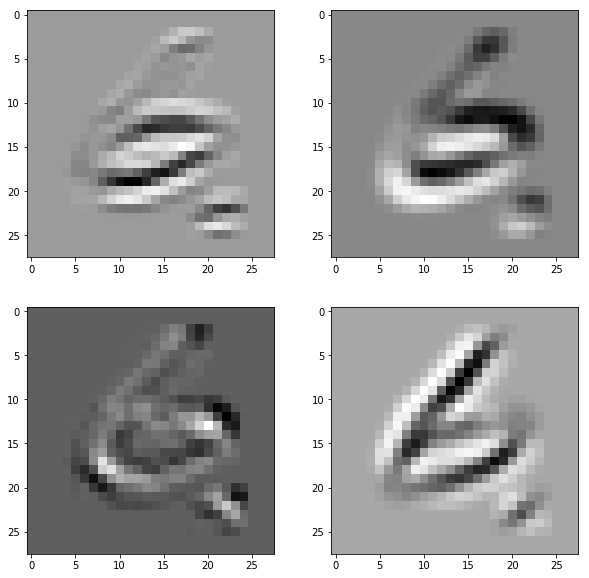

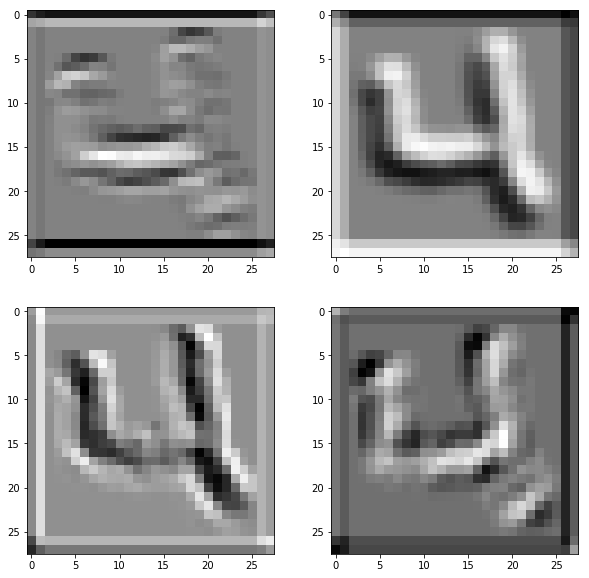

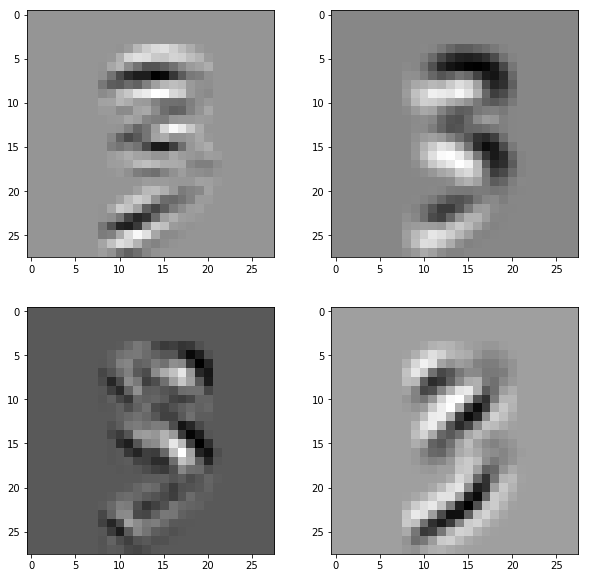

In [30]:
modelG1.visualize(0,4)

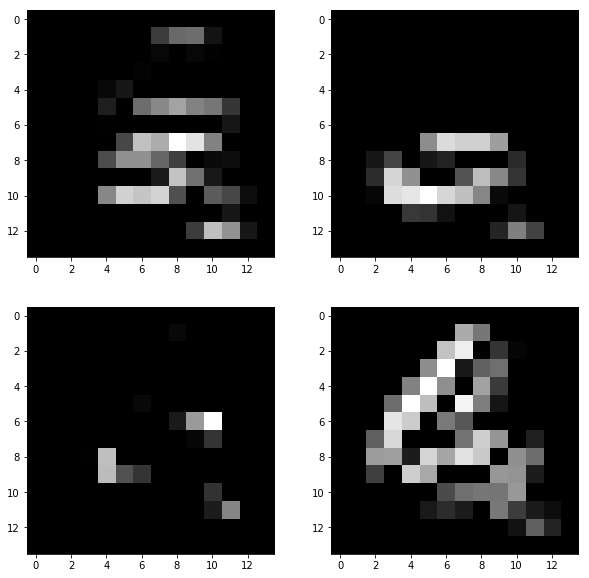

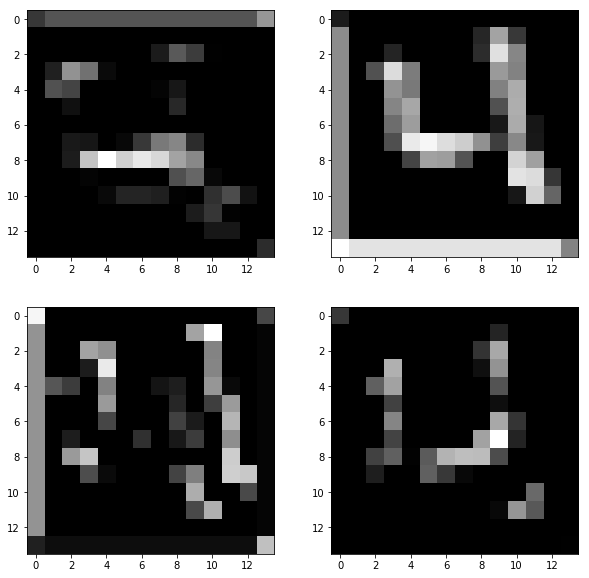

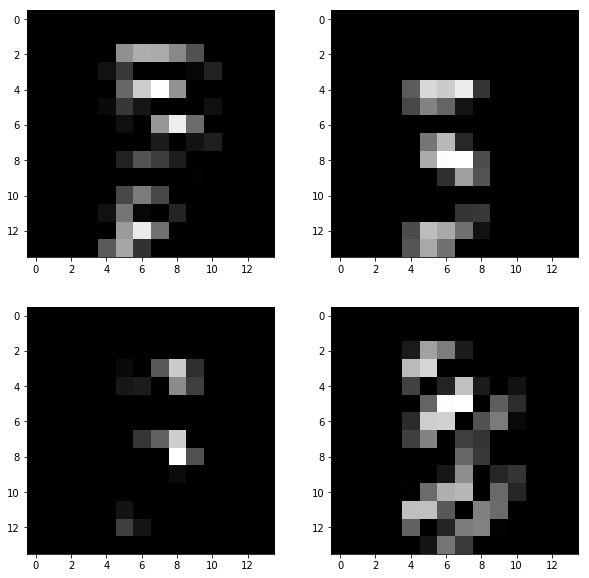

In [31]:
modelG1.visualize(3,4)

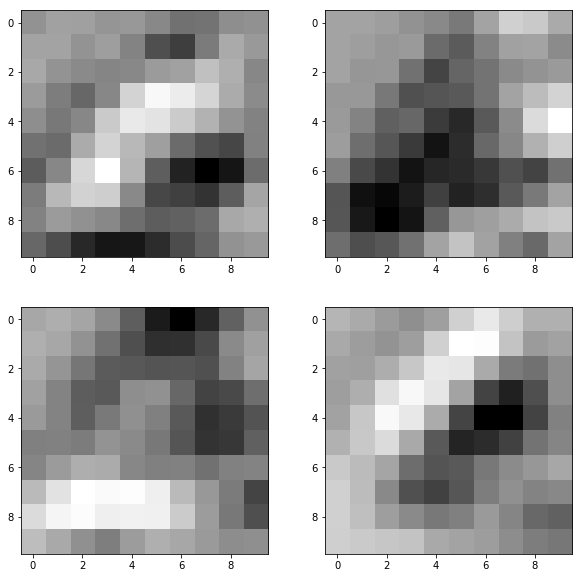

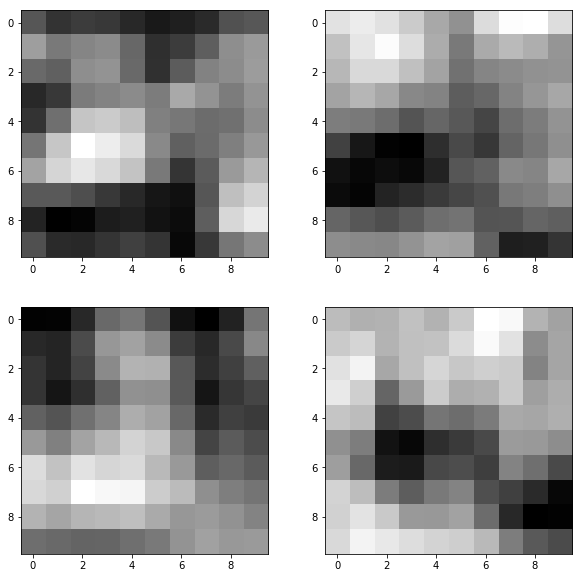

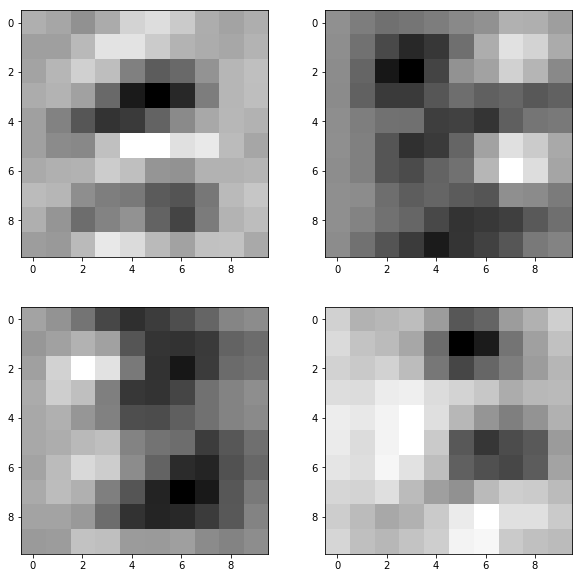

In [32]:
modelG1.visualize(4,4)

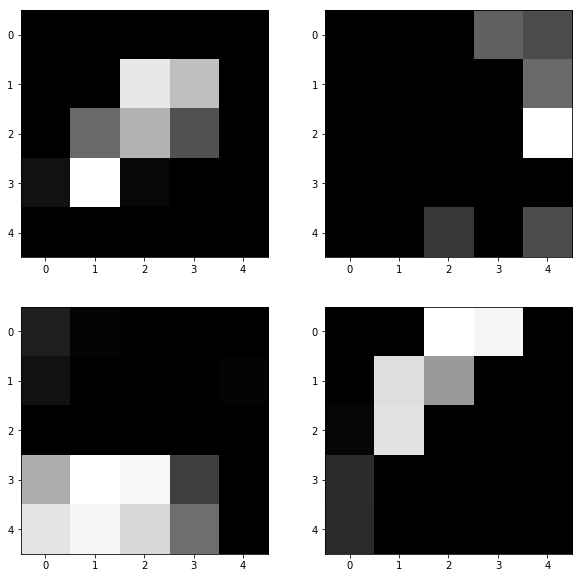

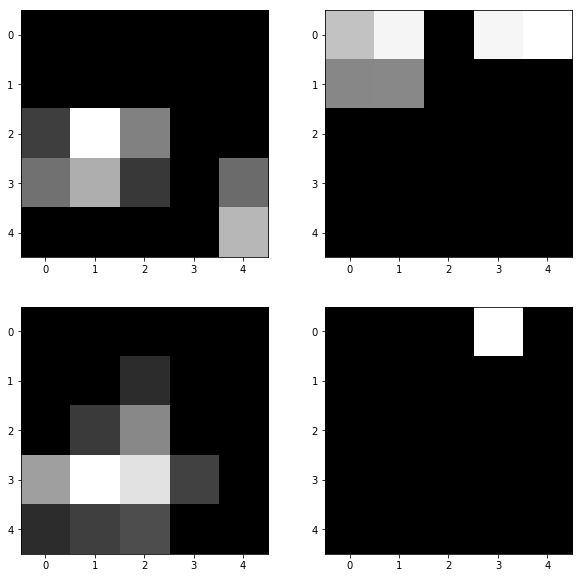

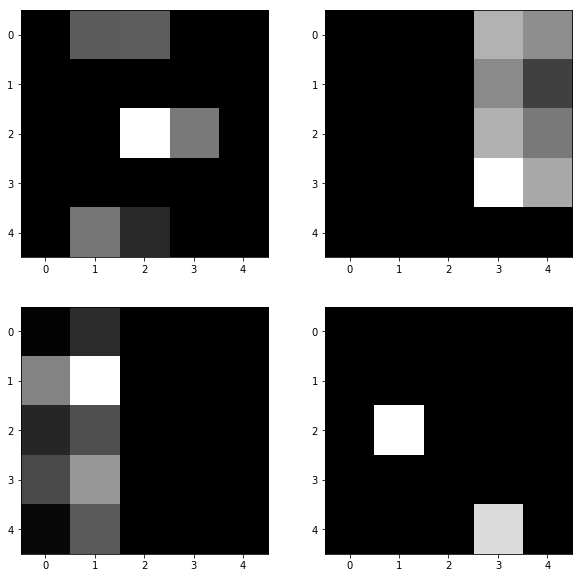

In [57]:
modelG1.visualize(7,4)

# Setting 1c - approach 1

In [46]:
(xb_train, yb_train), (xb_test, yb_test) = mnist.load_data()
xw_train = 255 - xb_train
xw_test = 255 - xb_test
yw_train = yb_train
yw_test = yb_test
data_train1 = np.zeros((120000,28,28))
data_labels1 = np.zeros((120000))
test_train1 = np.zeros((20000,28,28))
test_labels1 = np.zeros((20000))
data_train1[0:60000,:,:] = xb_train[:,:,:]
data_train1[60000:,:,:] = xw_train[:,:,:]
data_labels1[0:60000] = yb_train[:]
data_labels1[60000:] = yw_train[:]
test_train1[0:10000,:,:] = xb_test[:,:,:] 
test_train1[10000:,:,:] = xw_test[:,:,:]
test_labels1[0:10000] = yb_test[:]
test_labels1[10000:] = yw_test[:]
data_train = np.zeros((120000,28,28))
data_labels = np.zeros((120000))
test_train = np.zeros((20000,28,28))
test_labels = np.zeros((20000))
testL = test_labels.copy()

In [47]:
data_train = data_train1 
data_labels = data_labels1
test_train = test_train1
test_labels = test_labels1

3.0


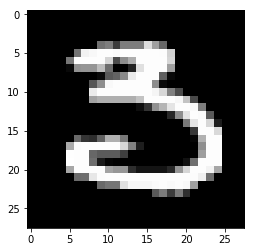

In [48]:
plt.imshow(data_train[670,:,:],cmap='gray')
print(data_labels[670])

In [49]:
count = 0

for i in range(0,120000):
    if (data_labels[i]==1):
        count = count + 1

count

13484

In [50]:
data_labels = keras.utils.to_categorical(data_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [51]:
data_train = data_train.reshape(120000,28,28,1)
test_train = test_train.reshape(20000,28,28,1)

In [52]:
data_train = data_train.astype('float32')
test_train = test_train.astype('float32')
data_train /= 255
test_train /= 255

In [55]:
modelG2 = conv_model_mod(model_fname="modelG2_v1.json",weight_fname="modelG2_v1.h5",x_train=data_train,y_train=data_labels)
modelG2.train_model(filters1=18,filters2 = 25,kernel_size1 = (5,5),kernel_size2 = (5,5),
            dense1= 120, dense2=84 , stride=None,pool_size_=(2,2),strides_pool = None)
modelG2.compile_model(optimizer_='adam',loss_='categorical_crossentropy')
modelG2.fit_model(val_flag=1,epoch=17,x_test=test_train,y_test=test_labels,cb_name="modelG2.h5",batch_size_=32)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 18)        468       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 18)        72        
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 18)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 25)        11275     
_________________________________________________________________
batch_normalization_6 (Batch (None, 10, 10, 25)        100       
_________________________________________________________________
activation_6 (Activation)    (None, 10, 10, 25)        0         
__________

In [58]:
results,metrics = modelG2.evaluate_model(test_train,test_labels,batch_size_=None)
print (results)
print(metrics)

20000/20000 [==============================] - 17s 860us/step
[0.03817943111331199, 0.0022478099943742504, 0.99055]
['loss', 'mean_absolute_error', 'acc']


In [151]:
from pathlib import Path
f = Path("modelG2_v1.json")
modelvar = f.read_text()
model_temp = model_from_json(modelvar)
#Accuracy of best model ( early stopping model )
model_temp.load_weights("modelG2.h5")
model_temp.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['mae', 'accuracy'])
model_temp.evaluate(x_test,y_test,batch_size=None)

10000/10000 [==============================] - 11s 1ms/step


[0.030780099914341236, 0.0018585146175407665, 0.9924]

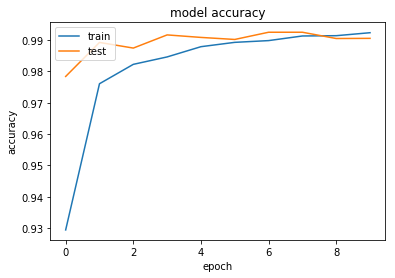

In [59]:
modelG2.plot_curve()

In [167]:
test = np.zeros((8,28,28))
test[0,:,:] = xw_test [284,:,:]
test[1,:,:] = xb_test [130,:,:]
test[2,:,:] = xw_test [2289,:,:]
test[3,:,:] = xw_test [52,:,:]
#test[4,:,:] = xb_test [2,:,:]
#test[5,:,:] = xb_test [41,:,:]
test[4,:,:] = xb_test [25,:,:]
test[5,:,:] = xw_test [11,:,:]
test[6,:,:] = xb_test [99,:,:]
test[7,:,:] = xw_test [22,:,:]

test = test.reshape(8,28,28,1)
truetest = [yw_test[284],yw_test[130],yw_test[2289],yw_test[52],yw_test[25],yw_test[11],yw_test[99],
            yw_test[22]]
modelG1.model.predict_classes(test)

array([9, 6, 8, 5, 0, 6, 9, 6], dtype=int64)

In [168]:
truetest

[9, 6, 8, 5, 0, 6, 9, 6]

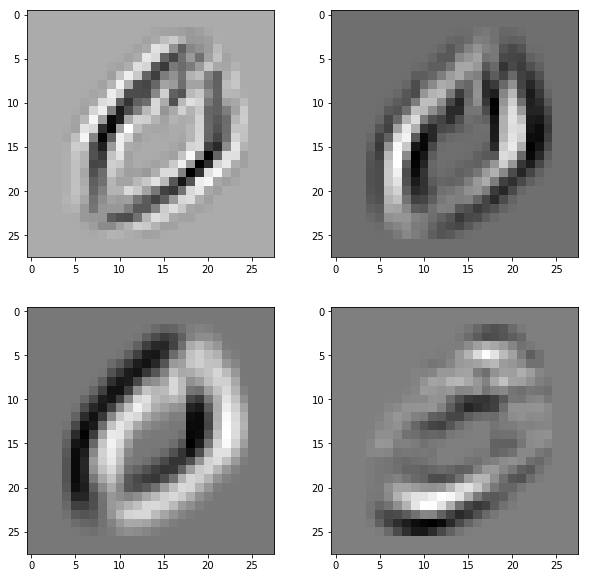

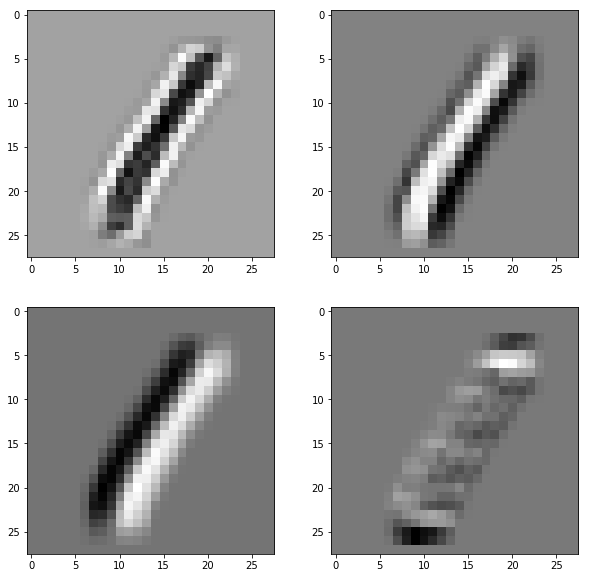

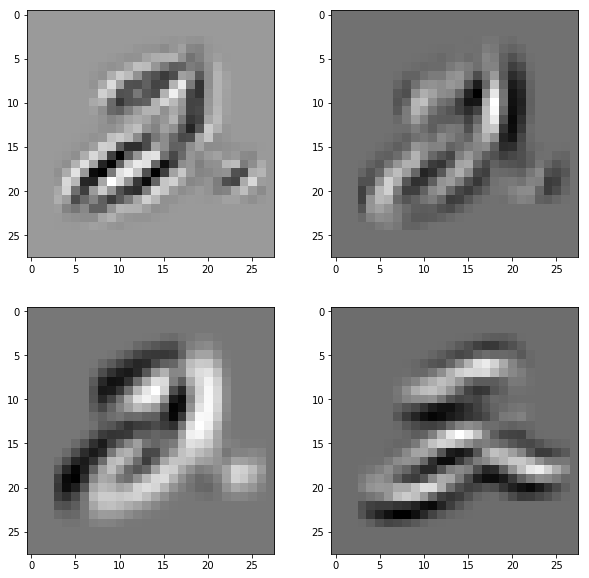

In [60]:
modelG2.visualize(0,4)

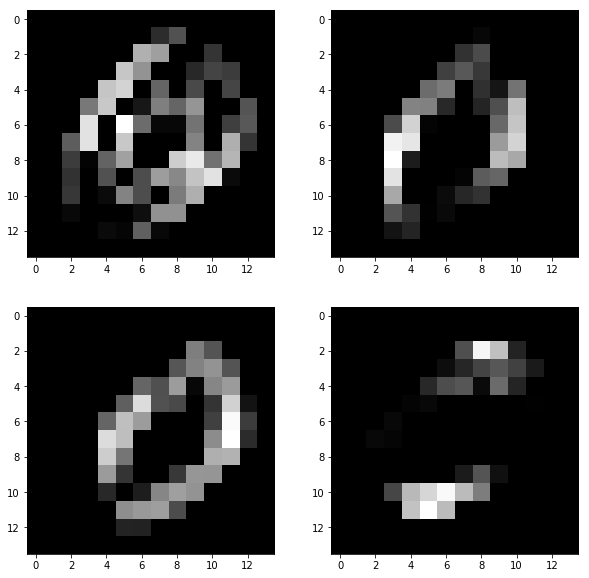

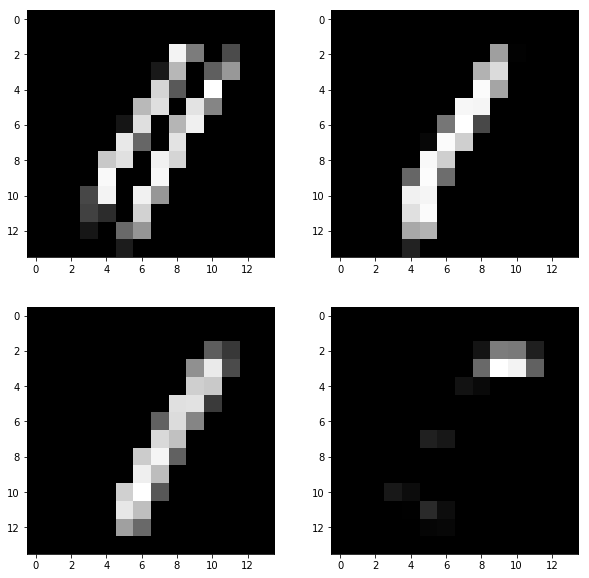

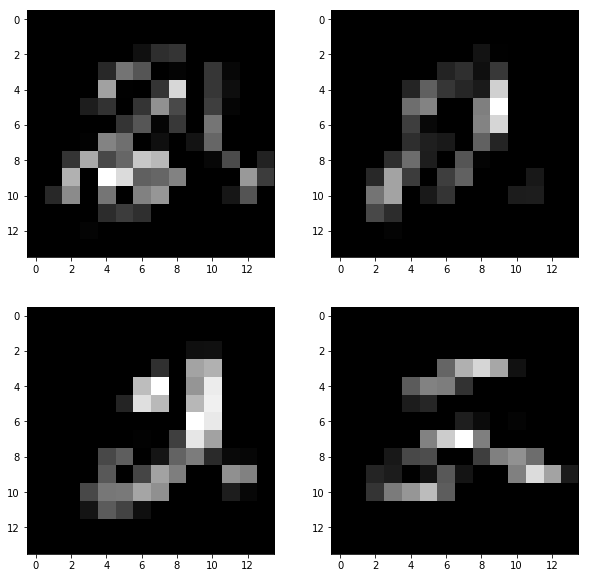

In [61]:
modelG2.visualize(3,4)

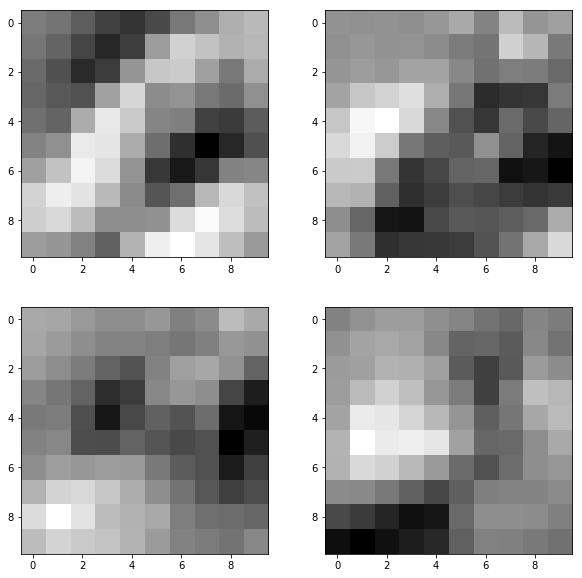

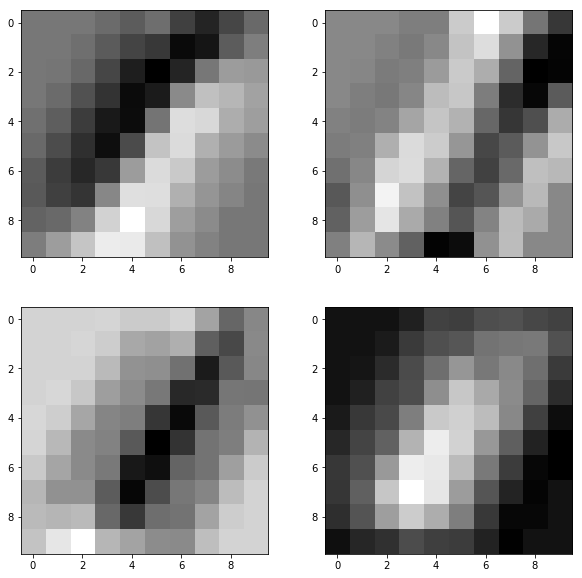

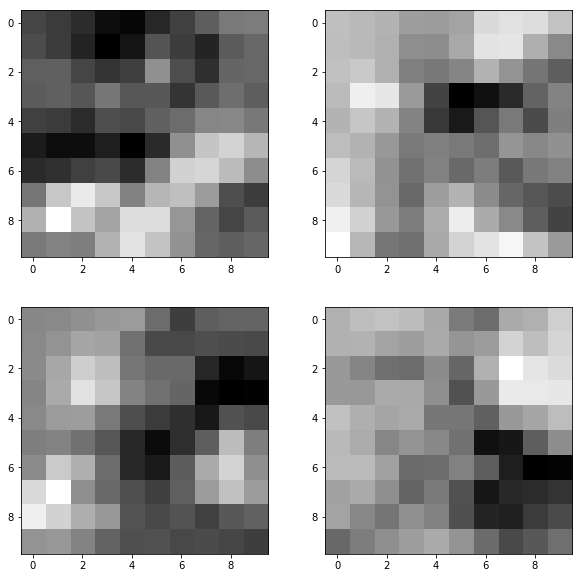

In [62]:
modelG2.visualize(4,4)

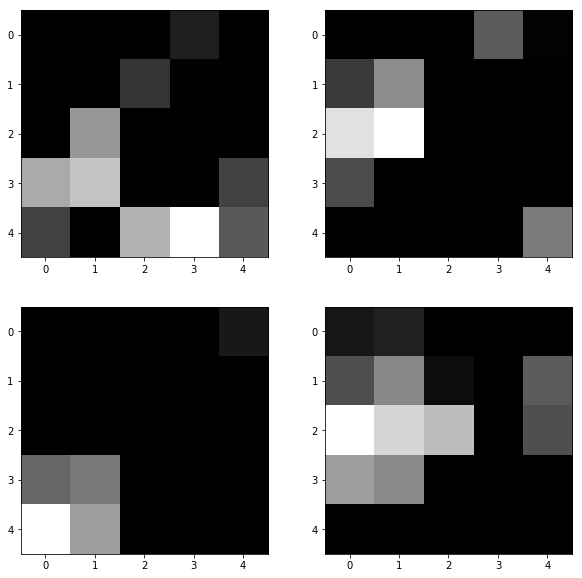

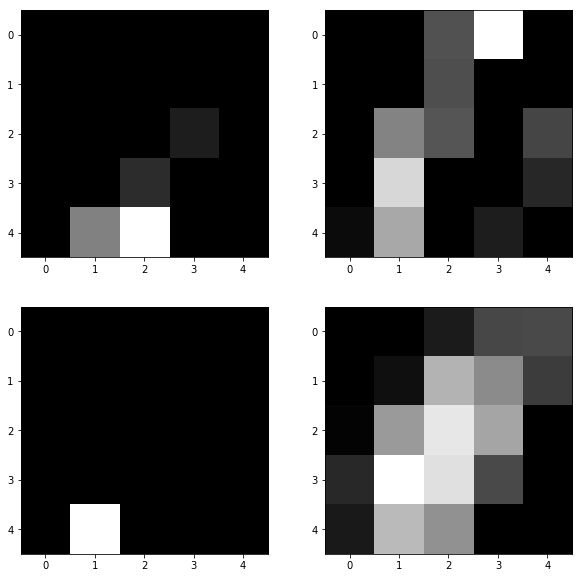

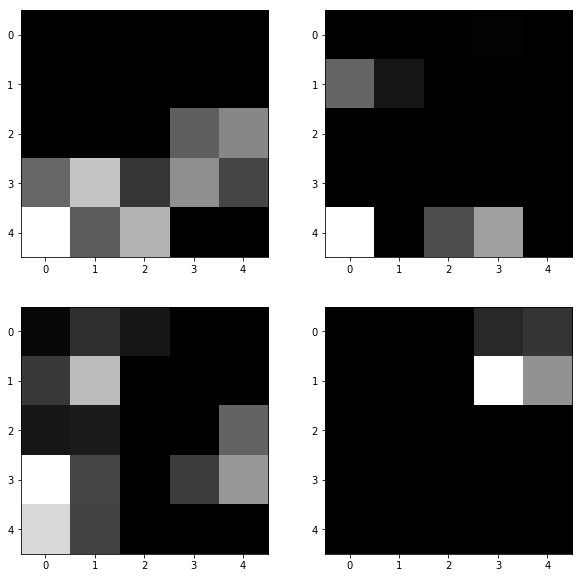

In [63]:
modelG2.visualize(7,4)

In [193]:
lst_tr = [99.19,99.3,94.75,98.45,99.1]
lst_test = [99.13,99.18,95.2,98.31,99.19]
mean_tr = np.mean(lst_tr)
var_tr = np.var(lst_tr)
mean_test = np.mean(lst_test)
var_test = np.var(lst_test)
print(mean_tr)
print(var_tr)
print(mean_test)
print(var_test)



98.15799999999999
2.991255999999996
98.202
2.363495999999997


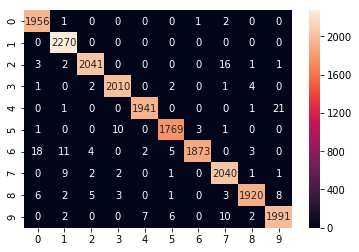

In [71]:
modelG2.confusion_matrix(test_train,np.argmax(test_labels,axis=1))

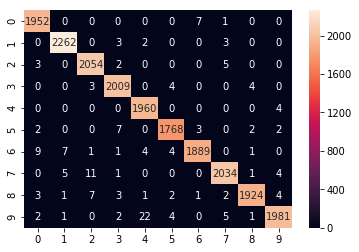

In [72]:
modelG1.confusion_matrix(test_train,np.argmax(test_labels,axis=1))

In [74]:
pred_labels = modelG1.model.predict_classes(test_train)
rep = skm.classification_report(pred_labels,np.argmax(test_labels,axis=1))
print(rep)

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1971
          1       1.00      0.99      1.00      2276
          2       1.00      0.99      0.99      2076
          3       0.99      0.99      0.99      2028
          4       1.00      0.99      0.99      1989
          5       0.99      0.99      0.99      1782
          6       0.99      0.99      0.99      1900
          7       0.99      0.99      0.99      2050
          8       0.99      1.00      0.99      1933
          9       0.98      0.99      0.99      1995

avg / total       0.99      0.99      0.99     20000



In [76]:
pred_labels = modelG2.model.predict_classes(test_train)
rep = skm.classification_report(pred_labels,np.argmax(test_labels,axis=1))
print(rep)

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1985
          1       1.00      0.99      0.99      2298
          2       0.99      0.99      0.99      2054
          3       1.00      0.99      0.99      2025
          4       0.99      1.00      0.99      1950
          5       0.99      0.99      0.99      1784
          6       0.98      1.00      0.99      1877
          7       0.99      0.98      0.99      2073
          8       0.99      0.99      0.99      1932
          9       0.99      0.98      0.99      2022

avg / total       0.99      0.99      0.99     20000

